# **Keras 3.0 + Pytorch**

Most important features:
- multi-backend (Tensorflow, JAX, Pytorch)
- Keras Ops module
- optimized & re-designed
- KerasCV & KerasNLP packages

## **Instalation**

From command line:
```bash
pip3 install keras --upgrade
pip3 install keras-cv
```
<br>

For Anaconda environment:
```bash
conda activate Yourenvironment
conda install pytorch
conda update keras
conda install keras-cv
```
<br>
   
When making a new env:
```bash
conda create -n Keras3 python=3.11 pytorch keras keras-cv #(or tensorflow or jax)
```
<br>

For Conda installation, GPU support should set-up automatially. If you encounter issues, checkout the current requirements at https://github.com/keras-team/keras/tree/master.

## **Import & select backend**

From Python script or notebook:
```python
import os
os.environ["KERAS_BACKEND"] = "jax"
```
<br>

From command line:
```bash
export KERAS_BACKEND="jax"
```
<br>

Permanently:

edit file `keras.json` (usually it's located in `.keras` hidden folder in your home directory)
```json
{
    ...
    "backend": "jax",
    ...
}
```

In [1]:
import matplotlib.pyplot as plt

import os
os.environ["KERAS_BACKEND"] = "torch"

from keras import ops
from keras import layers
from keras.datasets import mnist
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import CategoricalAccuracy
from keras.losses import CategoricalCrossentropy

## **Load data**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255
X_test = X_test / 255  

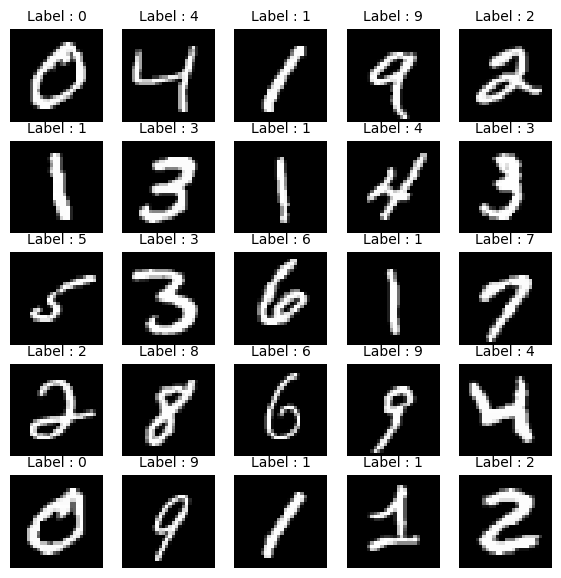

In [3]:
plt.figure(figsize=(7,7))
x = 1
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,x)
        plt.title(f"Label : {y_train[x]}", size=10)
        plt.imshow(X_train[x], cmap="gray");
        plt.axis("off")
        x += 1

### **Transform X**

grayscale images = single channel

(28, 28)  $\rightarrow$ (28, 28, 1)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Reshape
X_train = X_train.reshape((*X_train.shape, 1))  
X_test = X_test.reshape((*X_test.shape, 1))

In [6]:
X_train.shape

(60000, 28, 28, 1)

### **Transform Y**

In [7]:
y_train[0]

5

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
ops.argmax(y_train[0])

tensor(5, dtype=torch.int32)

## **Define network**

Multi-class classification $\: \rightarrow \:$ softmax activation function

$$y\,(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

\+ categorical crossentropy
 
$$L = -\sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})$$

 - $N$ is the number of samples
 - $C$ is the number of classes
 - $y_{ij}$ is a binary indicator (0 or 1) if class label $j$ is the correct classification for sample $i$
 - $\hat{y}_{ij}$ is the predicted probability of sample $i$ being of class $j$

In [11]:
def get_model():
    model = Sequential(
        [layers.Input(shape=(28, 28, 1)),
         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
         layers.GlobalAveragePooling2D(),
         layers.Dropout(0.2),
         layers.Dense(10, activation="softmax")]
    )
    
    return model

model = get_model()

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,218 (149.29 KB)

 Trainable params: 38,218 (149.29 KB)

 Non-trainable params: 0 (0.00 B)

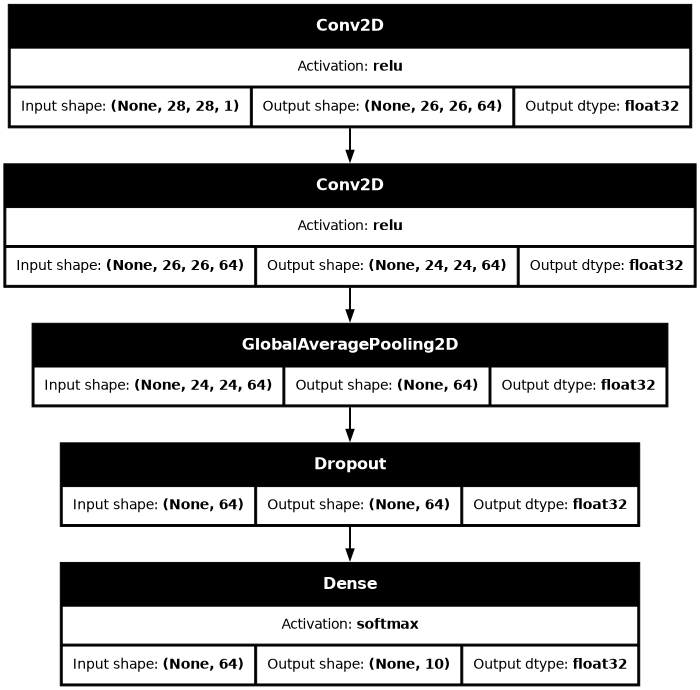

In [13]:
plot_model(
    model,
    dpi=70,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True,
    rankdir="TB"
)

## **Train model**

### **Default `.fit` method**

In [14]:
model = get_model()

model.compile(optimizer=Adam(learning_rate=0.002),
              loss=CategoricalCrossentropy(),
              metrics=[CategoricalAccuracy])

model.fit(X_train, y_train,
          batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - categorical_accuracy: 0.2589 - loss: 1.9427
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - categorical_accuracy: 0.4904 - loss: 1.3982
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - categorical_accuracy: 0.5691 - loss: 1.2164
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 157ms/step - categorical_accuracy: 0.6193 - loss: 1.0944
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 159ms/step - categorical_accuracy: 0.6633 - loss: 0.9760


In [15]:
# nvtop
# watch -d -n 1 nvidia-smi

In [16]:
model.evaluate(X_test, y_test, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - categorical_accuracy: 0.7898 - loss: 0.7505


[0.7016008496284485, 0.8057000041007996]

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [18]:
y_pred[0]

array([4.01722500e-04, 2.76643423e-05, 6.68057147e-03, 5.03557036e-04,
       1.06789026e-04, 2.51784176e-03, 2.83878355e-04, 9.71169651e-01,
       3.14017088e-04, 1.79942753e-02], dtype=float32)

In [19]:
y_pred[0].round(3)

array([0.   , 0.   , 0.007, 0.001, 0.   , 0.003, 0.   , 0.971, 0.   ,
       0.018], dtype=float32)

In [20]:
ops.argmax(y_pred[0].round(3))

tensor(7, dtype=torch.int32)

In [21]:
ops.argmax(y_test[0])

tensor(7, dtype=torch.int32)

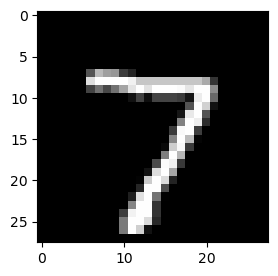

In [22]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0], cmap="gray");

### **Custom training iteration**

In [23]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

#### **Training loop step-by-step**

In [24]:
# Load Keras model
model = get_model()

# Optimizer: Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Loss function: Crossenstropy
loss_fn = CategoricalCrossentropy()

# Potentially we can define our own LOSS (ideally using ops module)
def custom_loss_fn(y_pred, y_true):
    y_pred = ops.clip(y_pred, 1e-7, 1.0)
    
    log_preds = ops.log(y_pred)
    
    cross_entropy = -ops.sum(y_true * log_preds, axis=-1)
    
    return ops.mean(cross_entropy, axis=-1)

#### **1. input array (batchsize $\,\times\,$ image shape)**

In [25]:
batchsize = 128

inputs = torch.tensor(X_train[0:batchsize], device=device)
targets = torch.tensor(y_train[0:batchsize], device=device)

print(inputs.shape, targets.shape)

torch.Size([128, 28, 28, 1]) torch.Size([128, 10])


In [26]:
print(inputs.device, targets.device)

cpu cpu


#### **2. forward pass - array of probabilities (batchsize $\,\times\,$ classes)**

In [27]:
probs = model(inputs)

probs.shape

torch.Size([128, 10])

In [28]:
probs[0]

tensor([0.0966, 0.1003, 0.0963, 0.1016, 0.1043, 0.0981, 0.1028, 0.1001, 0.1016,
        0.0984], grad_fn=<SelectBackward0>)

In [29]:
probs[0].sum()

tensor(1., grad_fn=<SumBackward0>)

#### **3. calculate the loss**

In [30]:
loss = custom_loss_fn(probs, targets)

loss

tensor(2.3041, dtype=torch.float64, grad_fn=<MeanBackward1>)

#### **4. backward pass**

In [31]:
model.zero_grad()

loss.backward()

#### **5. optimizer**

In [32]:
optimizer.step()

#### **check if model changed**

In [33]:
probs2 = model(inputs)

loss2 = custom_loss_fn(probs2, targets)

loss2

tensor(2.2821, dtype=torch.float64, grad_fn=<MeanBackward1>)

### **Training loop**

In [34]:
# Load Keras model
model = get_model()

# Optimizer: Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Define batchsize and # of epochs
batchsize = 128
epochs = 5
number_of_updates = X_train.shape[0] // batchsize

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    
    for step in range(number_of_updates):
        i0 = step * batchsize
        i1 = (step+1) * batchsize
        
        # Pytorch Tensor + Send to GPU
        inputs = torch.tensor(X_train[i0:i1], device=device)
        targets = torch.tensor(y_train[i0:i1], device=device)
        
        # Forward pass
        probs = model(inputs)
        loss = custom_loss_fn(probs, targets)

        # Backward pass
        model.zero_grad()
        loss.backward()

        # Optimizer variable updates
        optimizer.step()

        # Log every 1000 batches.
        if i1 % 1000 == 0:
            print(f"Training loss at step {step:4d} ({(step + 1) * batchsize:5d} images): {loss.cpu().detach().numpy():.4f}")

Epoch: 1
Training loss at step  124 (16000 images): 1.7607
Training loss at step  249 (32000 images): 1.3885
Training loss at step  374 (48000 images): 1.1398
Epoch: 2
Training loss at step  124 (16000 images): 0.9810
Training loss at step  249 (32000 images): 0.8261
Training loss at step  374 (48000 images): 0.8035
Epoch: 3
Training loss at step  124 (16000 images): 0.7059
Training loss at step  249 (32000 images): 0.6041
Training loss at step  374 (48000 images): 0.5327
Epoch: 4
Training loss at step  124 (16000 images): 0.5863
Training loss at step  249 (32000 images): 0.5003
Training loss at step  374 (48000 images): 0.3790
Epoch: 5
Training loss at step  124 (16000 images): 0.5206
Training loss at step  249 (32000 images): 0.4341
Training loss at step  374 (48000 images): 0.2969


### **Measure accuracy**

In [ ]:
# Load Keras model
model = get_model()

# Optimizer: Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Metrcis: Categorical Accuracy
train_acc_metric = CategoricalAccuracy()
val_acc_metric = CategoricalAccuracy()


batchsize = 128
epochs = 5
number_of_updates = X_train.shape[0] // batchsize

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    
    for step in range(number_of_updates):
        i0 = step * batchsize
        i1 = (step+1) * batchsize
        
        # Pytorch Tensor + Send to GPU
        inputs = torch.tensor(X_train[i0:i1], device=device)
        targets = torch.tensor(y_train[i0:i1], device=device)
        
        # Forward pass
        probs = model(inputs)
        loss = custom_loss_fn(probs, targets)

        # Update metrics
        train_acc_metric.update_state(targets, probs)
        
        # Backward pass
        model.zero_grad()
        loss.backward()

        # Optimizer variable updates
        optimizer.step()

        # Log every 100 batches.
        if i1 % 1000 == 0:
            print(f"Training loss at step {step:4d} ({(step + 1) * batchsize:5d} images): {loss.cpu().detach().numpy():.4f}")
            
    train_acc = train_acc_metric.result()
    print(f"Training acc: {float(train_acc):.4f}")
    
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_state()

    # Calculate 
    val_probs = model(X_test, training=False)
    # Update val metrics
    val_acc_metric.update_state(y_test, val_probs)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_state()
    print(f"Validation acc: {float(val_acc):.4f}\n")

Epoch: 1
Training loss at step  124 (16000 images): 1.7271


### **Adding a scheduler**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.4)

epochs = 5
lr_history = []

for epoch in range(epochs):
    lr = optimizer.param_groups[0]['lr']
    lr_history.append(lr)
    
    print(f"Epoch: {epoch+1}")
    print(f"Learning rate: {lr:.2g}\n")
    
    scheduler.step()
        
plt.plot(lr_history);

In [ ]:
# Load Keras model
model = get_model()

# Optimizer: Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

# Metrcis: Categorical Accuracy
train_acc_metric = CategoricalAccuracy()
val_acc_metric = CategoricalAccuracy()


batchsize = 128
epochs = 5
number_of_updates = X_train.shape[0] // batchsize

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
    
    for step in range(number_of_updates):
        i0 = step * batchsize
        i1 = (step+1) * batchsize
        
        # Pytorch Tensor + Send to GPU
        inputs = torch.tensor(X_train[i0:i1], device=device)
        targets = torch.tensor(y_train[i0:i1], device=device)
        
        # Forward pass
        probs = model(inputs)
        loss = custom_loss_fn(probs, targets)

        # Update metrics
        train_acc_metric.update_state(targets, probs)
        
        # Backward pass
        model.zero_grad()
        loss.backward()

        # Optimizer variable updates
        optimizer.step()

        # Log every 100 batches.
        if i1 % 1000 == 0:
            print(f"Training loss at step {step:4d} ({(step + 1) * batchsize:5d} images): {loss.cpu().detach().numpy():.4f}")
            
    if epoch % 2 == 0:
        scheduler.step()
            
    train_acc = train_acc_metric.result()
    print(f"Training acc: {float(train_acc):.4f}")
    
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_state()

    # Calculate 
    val_probs = model(X_test, training=False)
    # Update val metrics
    val_acc_metric.update_state(y_test, val_probs)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_state()
    print(f"Validation acc: {float(val_acc):.4f}\n")

## **Keras: available models**

https://keras.io/api/applications/

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "torch"

from keras.ops import expand_dims
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [ ]:
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

img

In [ ]:
img_path = 'chinchilla.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

img

## **Other platforms with pre-trained models**

- [HuggingFace](https://huggingface.co/models)
    - hub: [OpenAI](https://huggingface.co/openai), [Llama](https://huggingface.co/meta-llama), [StabilityAI](https://huggingface.co/stabilityai/stable-diffusion-2), [CADET](https://huggingface.co/Plsek/CADET-v1)
    - transformers, diffusers, [agents](https://huggingface.co/docs/transformers/transformers_agents)
- [LangChain](https://python.langchain.com/docs/get_started/quickstart) - custom chatbot

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")
image

## **Final projects**

Datasets:
- [AstroNN](https://astronn.readthedocs.io/en/stable/galaxy10.html)
- [AstroML](https://www.astroml.org/user_guide/datasets.html)
- [Kaggle](https://www.kaggle.com/)
- [HuggingFace](https://huggingface.co/datasets)

Or build you own dataset:
- filter & preprocess data: 
    - light curves ([OGLE](https://ogledb.astrouw.edu.pl/~ogle/OCVS/))
    - X-ray data ([Chandra](https://cxcfps.cfa.harvard.edu/cda/footprint/cdaview.html))
    - GAIA data ([Astroquery](https://www.cosmos.esa.int/web/gaia-users/archive/programmatic-access))
    - VLBI images ([astrogeo](http://astrogeo.org/vlbi_images/)) 
    - SwiftXRT data ([Swift database](https://www.swift.ac.uk/user_objects/))
- simulate data: 
    - gamma-ray bursts ([cosmogrb](https://github.com/grburgess/cosmogrb))
    - X-ray spectrum ([Sherpa](https://cxc.cfa.harvard.edu/sherpa/threads/fake_pha/))
    - X-ray image ([pyxsim](https://hea-www.cfa.harvard.edu/~jzuhone/pyxsim/cookbook/Thermal_Emission.html))